In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model


In [9]:
(x_train, _), (x_test, _) = fashion_mnist.load_data() # dans https://stackoverflow.com/questions/51971192/where-is-the-downloaded-keras-dataset-stored

In [10]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print (x_train.shape)
print (x_test.shape)


(60000, 28, 28)
(10000, 28, 28)


In [10]:
path = './documents_scolarité/données_scolarité_propres/'
vec = np.load(path+'phrases-vecteurs.npy')
s = np.shape(vec) # nombre de phrases, nombre de mots max, nombre de dimensions
s

(622, 164, 20)

In [24]:
latent_dim = 64
d = s[1]*s[2]


class Autoencoder(Model):
    def __init__(self, latent_dim):
        super(Autoencoder, self).__init__()
        self.latent_dim = latent_dim   


        self.encoder = tf.keras.Sequential([
          layers.Flatten(),
          layers.LSTM(d,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform'),
          layers.Dense(latent_dim, activation='relu'),
        ])
        self.decoder = tf.keras.Sequential([
          layers.LSTM(d),
          layers.Dense(d, activation='sigmoid'),
          layers.Reshape(s[1:])
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

autoencoder = Autoencoder(latent_dim)


In [25]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [26]:
autoencoder.fit(vec, vec,
                epochs=4,
                shuffle=True,
                validation_data=(vec, vec))

Epoch 1/4


ValueError: in user code:

    File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\engine\training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "autoencoder_3" (type Autoencoder).
    
    in user code:
    
        File "C:\Users\matth\AppData\Local\Temp/ipykernel_17720/721391357.py", line 23, in call  *
            encoded = self.encoder(x)
        File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler  **
            raise e.with_traceback(filtered_tb) from None
        File "C:\Users\matth\.conda\envs\tf\lib\site-packages\keras\engine\input_spec.py", line 213, in assert_input_compatibility
            raise ValueError(f'Input {input_index} of layer "{layer_name}" '
    
        ValueError: Exception encountered when calling layer "sequential_6" (type Sequential).
        
        Input 0 of layer "lstm_7" is incompatible with the layer: expected ndim=3, found ndim=2. Full shape received: (None, 3280)
        
        Call arguments received:
          • inputs=tf.Tensor(shape=(None, 164, 20), dtype=float32)
          • training=True
          • mask=None
    
    
    Call arguments received:
      • x=tf.Tensor(shape=(None, 164, 20), dtype=float32)


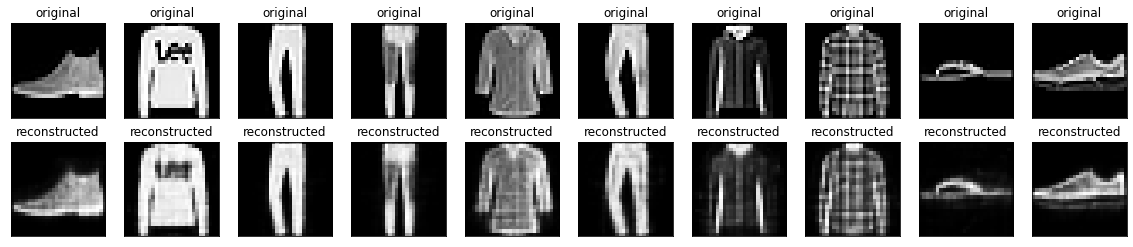

In [14]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i])
    plt.title("reconstructed")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
